In [38]:
from sklearn.cluster import KMeans
import numpy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas
import re
import os
import pickle
import urllib
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [2]:
def load_embedding(filename):
    X=[]
    index=[]
    f=open(filename)
    f.readline()
    for line in f:
        line=line.strip().split(' ')
        index.append(line[0])
        d=[float(x) for x in line[1:]]
        X.append(d)
    return index,numpy.array(X)

In [3]:
ne_index,ne_X=load_embedding('./data/dump/wiki.embedding')
lda_index,lda_X=load_embedding('./data/dump/lda_embeddint.txt')

In [4]:
cluster_count=20

In [5]:
ne_cluster=KMeans(n_clusters=cluster_count)
lda_cluster=KMeans(n_clusters=cluster_count)

In [6]:
ne_cluster.fit(ne_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
lda_cluster.fit(lda_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
ne_result=ne_cluster.predict(ne_X)

In [15]:
lda_result=lda_cluster.predict(lda_X)

In [16]:
index_to_title=dict()
for line in open('./data/dump/word_index.txt'):
    line=line.strip()
    title=line[:line.rfind(' ')]
    index=line[line.rfind(' ')+1:].strip()
    index_to_title[index]=title

In [17]:
lda_title=[urllib.parse.unquote(title).replace('_',' ') for title in lda_index]

In [18]:
ne_title=[]
hehe=0
for index in ne_index:
    if index in index_to_title:
        ne_title.append(index_to_title[index])
    else:
        hehe+=1
        ne_title.append('CANNOTFIND')

In [19]:
common_title=set(lda_title)&set(ne_title)

In [20]:
len(common_title)

69275

In [21]:
ne_component=[set() for _ in range(cluster_count)]
lda_component=[set() for _ in range(cluster_count)]

In [22]:
ne_result=dict(list(zip(ne_title,ne_result)))

In [23]:
lda_result=dict(list(zip(lda_title,lda_result)))

In [24]:
for title in common_title:
    ne_component[ne_result[title]].add(title)
    lda_component[lda_result[title]].add(title)

In [25]:
intersect=numpy.zeros((cluster_count,cluster_count))

In [26]:
for i in range(cluster_count):
    for j in range(cluster_count):
        intersect[i,j]=len(ne_component[i]&lda_component[j])/len(ne_component[i] | lda_component[j])

In [27]:
sorted(intersect.argmax(axis=0))

[3, 5, 6, 8, 9, 10, 10, 11, 11, 12, 13, 14, 14, 15, 15, 16, 17, 18, 18, 19]

In [28]:
intersect2=intersect[intersect.argmax(axis=0)]

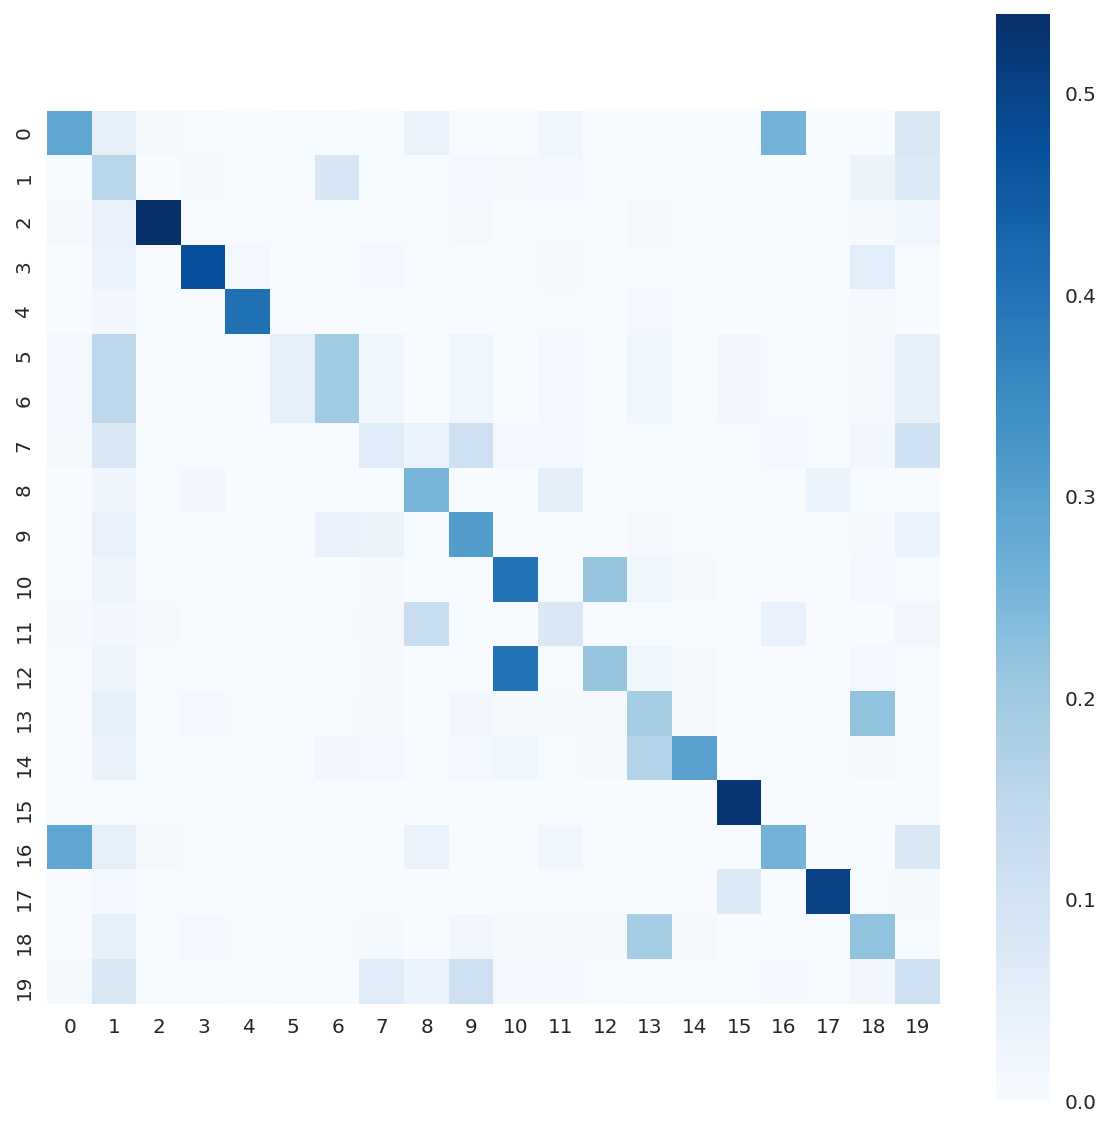

In [42]:
plt.figure(figsize=(10,10))
sns.set(style="white")
mask = numpy.zeros((cluster_count,cluster_count), dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap= sns.color_palette("YlGnBu",as_cmap=True)
# cmap = sns.color_palette('Reds')
# cmap = sns.light_palette((210, 90, 60), input="husl")
sns.heatmap(intersect2, cmap='Blues', square=True)
plt.show()

<Figure size 720x720 with 0 Axes>

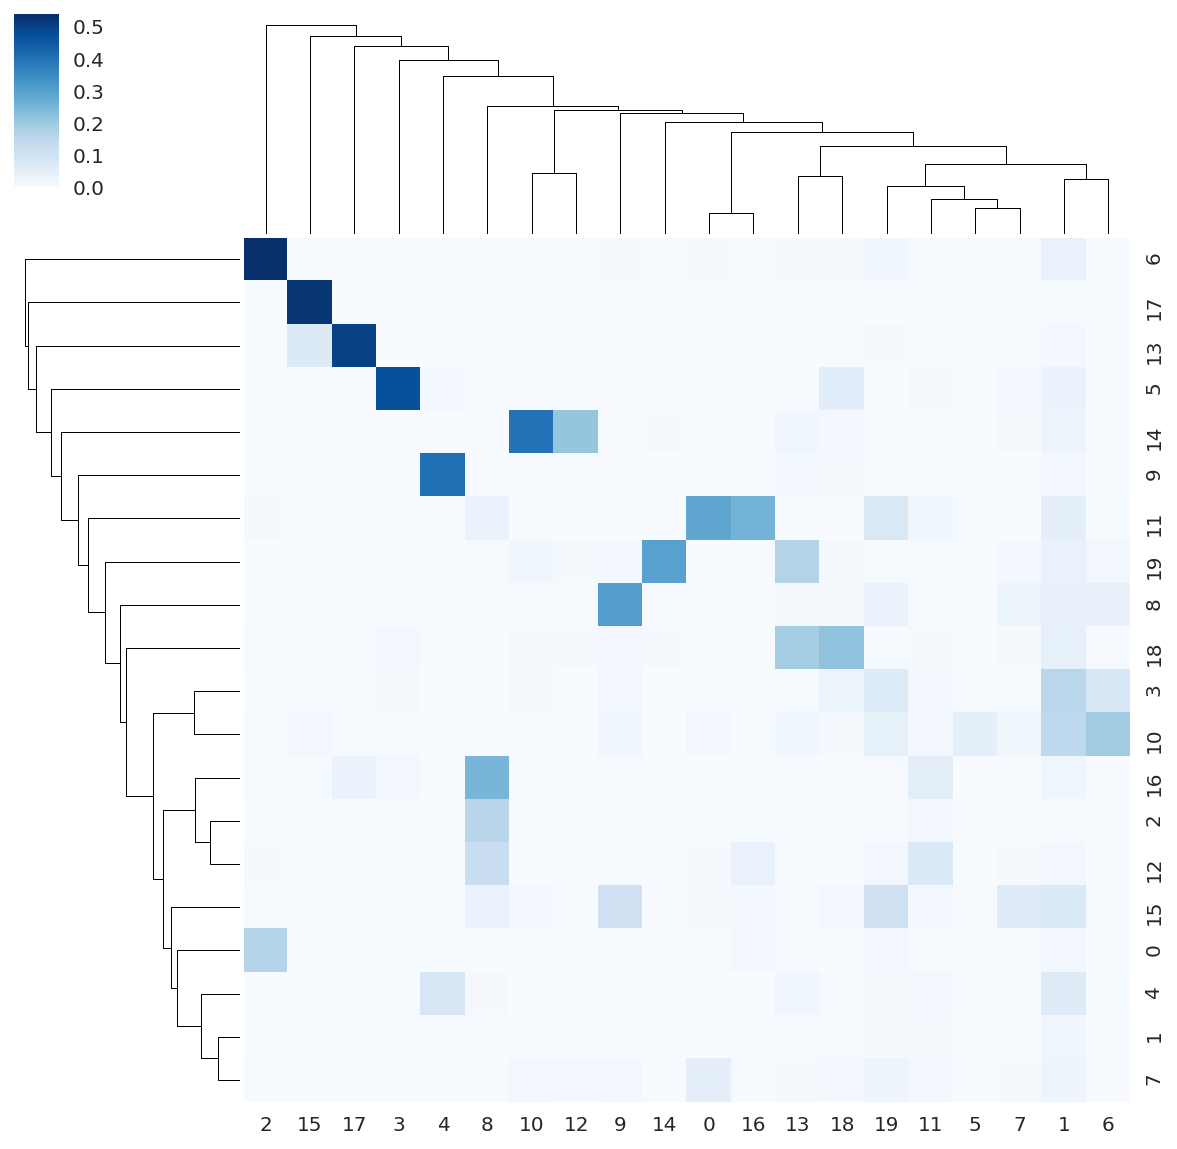

In [44]:
plt.figure(figsize=(10,10))
sns.set(style="white")
mask = numpy.zeros((cluster_count,cluster_count), dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap= sns.color_palette("YlGnBu",as_cmap=True)
# cmap = sns.color_palette('Reds')
# cmap = sns.light_palette((210, 90, 60), input="husl")
# sns.heatmap(intersect2, cmap='Blues',square=True)
sns.clustermap(data=intersect, fmt='d', cmap="Blues", annot_kws={"size": 26})

plt.show()